Title: The Fourier Transform
Author: Thomas Breuel
Institution: UniKL

In [2]:
from pylab import *

In [3]:
import os
def play(data,r=1,pad=8000):
    data = array(data*16000.0/amax(abs(data)),'int16')
    if r>1: data = array(list(data)*r)
    data = r_[zeros(pad,data.dtype),data,zeros(pad,data.dtype)]
    data.tofile("_out.raw")
    os.system("play -s2L -r 8000 _out.raw")

Simple Sine Waves, Frequencies and Phase
========================================

Sine waves complete one full wave over the interval $[0,2\pi]$.
We define a range of $x$ values covering this interval over
1024 sample points.

In [4]:
x = 2*pi*arange(1024,dtype='d')/1024.0

Now let's plot the sine and cosine.
Remember how these relate to rotation and polar coordinates.

These functions also frequently come up in differential equations
because $\sin'(x) = \cos(x)$ and $\cos'(x) = -\sin(x)$,
so 

$$\frac{d^2 f(x)}{dx} = -f(x)$$

has the solution 

$$f(x) = \sin(x)$$

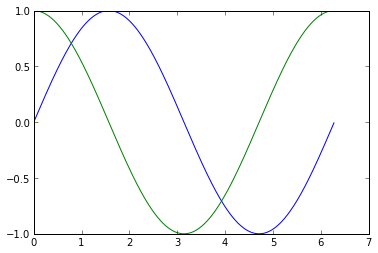

In [5]:
plot(x,sin(x))
plot(x,cos(x))

We can now generate sounds with these.

Pure sounds (and many other oscillations) are sine waves because they are generated by
harmonic oscillators.
Harmonic oscillators are oscillators in which the restoring force of a motion is
proportional to the deviation from equillibrium.
By Newton's second law, $F = ma$, this gives rise to the second order differential
equation above, and hence sine waves.

Most oscillators are harmonic at least for small oscillations
due to the Taylor series expansion.

The _frequency_ of an oscillation is how many waves occur per time period (i.e., how "frequently" the wave occurs in one time period).

Since we defined a time period as 1024 samples, we can generate sine waves as above.

Note that usually frequency is expressed in Hertz, that is vibrations per second.
Since we have a sampling rate of 8000/sec in the player, this means that the
frequency of this tone in Hertz is $128*8000/1024$ or 1000 Hz.

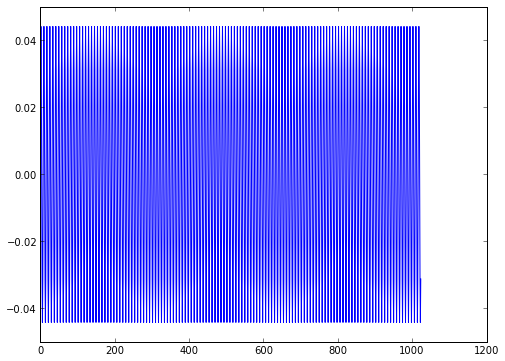

In [6]:
data128 = sin(128*x)
data128 /= norm(data128)
figsize(8,6); plot(data128)
play(data128,r=10)

Here is a tone with half that frequency, 500 Hz. This is _one octave below_ the other sounds.



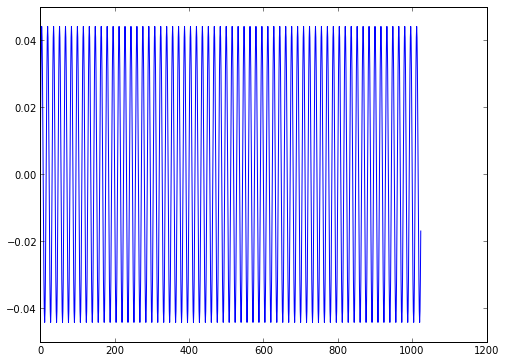

In [7]:
data64 = sin(64*x)
data64 /= norm(data64)
plot(data64)
play(data64,r=10)

And here is a 250 Hz tone, another octave below.



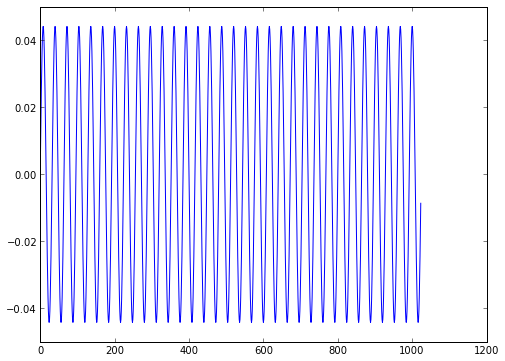

In [8]:
data32 = sin(32*x)
data32 /= norm(data32)
plot(data32)
play(data32,r=10)

We cannot perceive _phase_, so $\sin$ and $\cos$ sound the same.



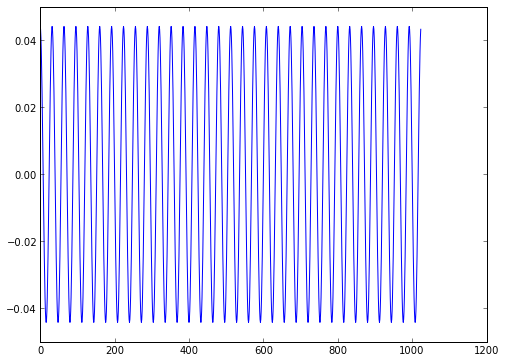

In [9]:
data32c = cos(32*x)
data32c /= norm(data32c)
plot(data32c)
play(data32c,r=10)

Note that we often work with _periodic signals_.  That is, we repeat a waveform
indefinitely.  The simple audio player above already does this.

When working with periodic signals, it is important to pay attention to _boundary conditions_.

Here is an abrupt jump at the end of the signal when wrapping around back to the beginning.



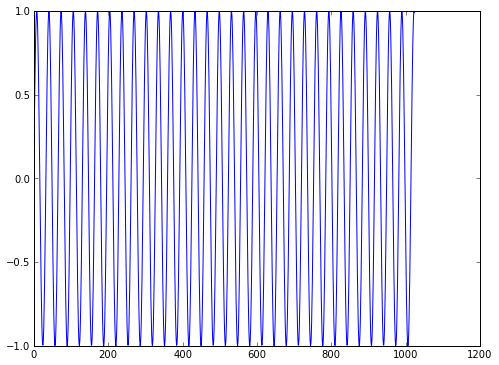

In [10]:
dataodd = sin(31.3*x)
plot(dataodd)
play(dataodd,r=10)

Orthogonality Relationships
==============================

Although we thought of our data as audio signals with a given frequency,
we can also view them as vectors.

When we do so, there are some interesting relationships.

Since we normalized our signals, the dot product of a signal with itself (as a vector) is 1.



In [11]:
dot(data32,data32)

0.99999999999999978

The dot product of a sine signal and a cosine signal is 0; the two signals are _orthogonal_ as vectors.



In [12]:
dot(data32,data32c)

-3.6591823321385775e-17

Likewise, the dot product of a signal and a signal of a different frequency is 0,
provided both signals actually correspond to periodic signals.

(Actually, it also works for half frequencies; this gives rise to the _cosine transform_).



In [13]:
dot(data32,data64)



1.698077442546797e-15

In [14]:
dot(data32,dataodd)

-4.9462849353357941

Quadrature
============

A general pure sine wave is parameterized by _frequency_ and _phase_:

$$f(x) = \sin(2\pi f x + \phi)$$

Although there are many different sine waves of different frequencies,
for any given frequency, there are really "only two" sine waves of
different phase.  

That is, any sine wave of a given frequency and an arbitrary phase 
can be represented as a linear combination of two sine waves of that
frequency, one with a phase of $0$ and another one with a phase of
$\frac{\pi}{2}$ (recall that $\cos x = \sin(x+\frac{\pi}{2})$).

The reason is this simple trigonometric identity:

$$\sin(u+v) = \sin u \cos v + \cos u \sin v$$

This means that for a given $v$, we can write any $\sin(u+v)$ as a linear
combination of $\sin v$ and $\cos v$.

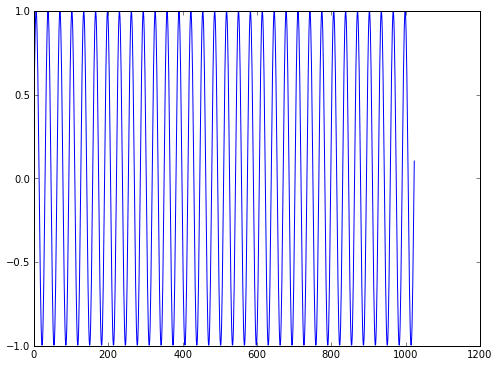

In [15]:
data32p = sin(32*x+0.3)
plot(data32p)
play(data32p,r=10)

In [16]:
dot(data32,data32p)



21.616797112821246

In [17]:
dot(data32c,data32p)



6.6868589474523308

In [18]:
dot(data32,data64)



1.698077442546797e-15

1.48469348354e-13


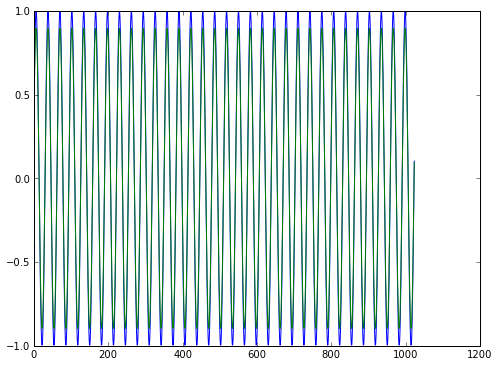

In [19]:
rec = dot(data32,data32p)*data32 + dot(data32c,data32p)*data32c
print norm(rec-data32p)
plot(rec)
plot(0.9*data32p)

A Complete Basis
===============

For periodic signals of length $N$ (here, $N=1024$), we have made the following observations:

- periodic signals of different frequencies are orthogonal to one another as vectors
- periodic signals of the same frequency at phase 0 and $\frac{\pi}{2}$ are orthogonal to one another as vectors

This suggests constructing a complete basis in the following way:

- take all sine and cosine functions for frequencies between 0 and 512 (inclusive) as a basis
- remove the sine function with frequency 0 (since it is just 0)
- remove the cosine function with frequency 512 (since it is just 0)

This way, we end up with 1024 orthogonal functions, and since our space only is 1024 dimensional, this
must be a complete basis for our linear space.

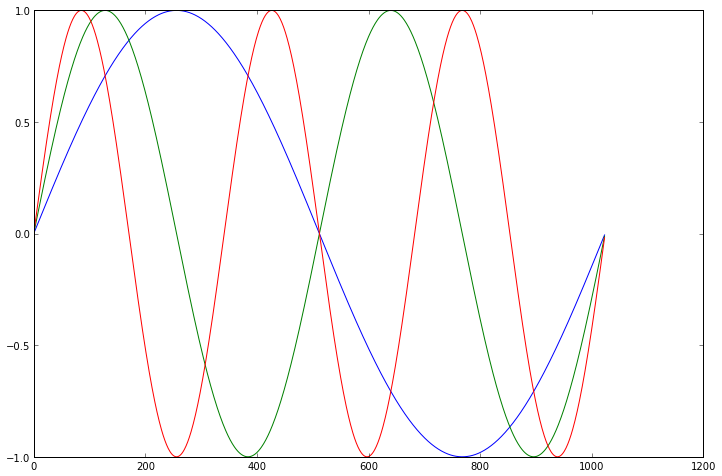

In [20]:
# first three elements of sine basis
sins = [sin(i*x) for i in range(1,513)]
figsize(12,8)
plot(sins[0])
plot(sins[1])
plot(sins[2])

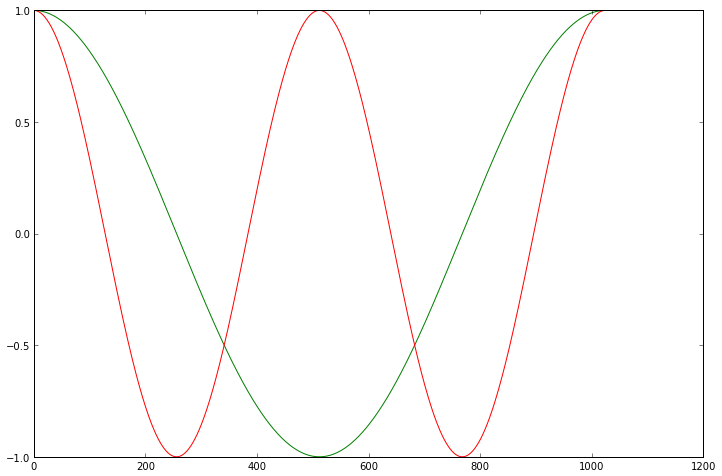

In [21]:
# first three elements of cosine basis
coss = [cos(2.0*pi*arange(1024)*i/1024.0) for i in range(0,512)]
figsize(12,8)
plot(coss[0])
plot(coss[1])
plot(coss[2])

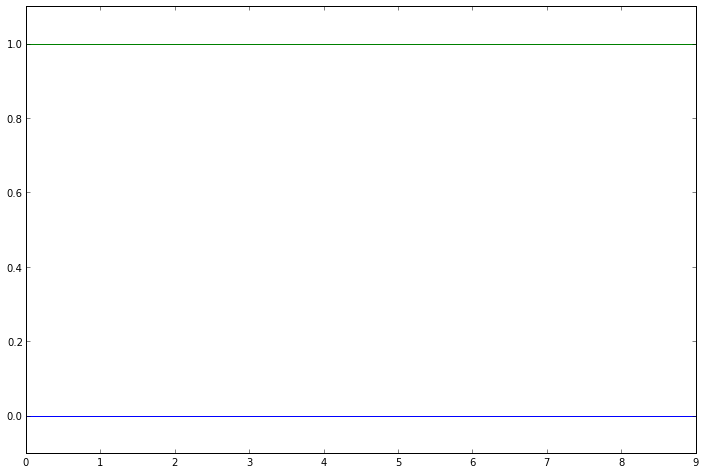

In [22]:
# there is only one zero frequency
ylim(-0.1,1.1)
plot(sin(0*x)[-10:])
plot(cos(0*x)[-10:])

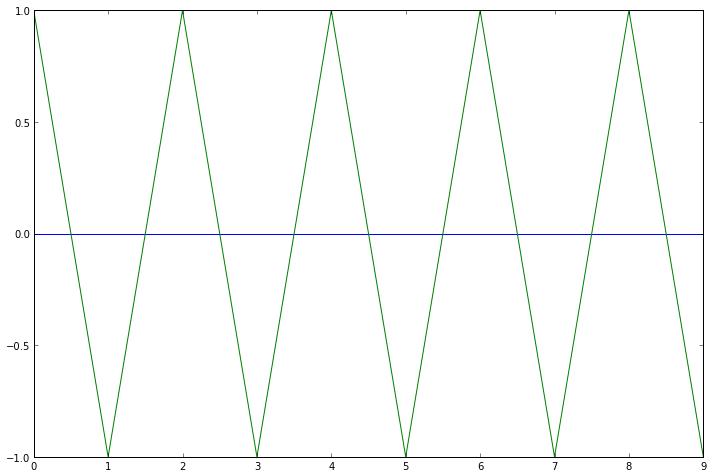

In [23]:
# there is only one frequency 512
plot(sin(512*x)[-10:])
plot(cos(512*x)[-10:])

Let's construct matrices out of these basis functions.



In [24]:
sins = array(sins)
coss = array(coss)

Now let's verify the orthogonality conditions.



-2.03463569425e-11 512.0
-2.88650492397e-11 1024.0
-2.1462665846e-11 2.21026530411e-11


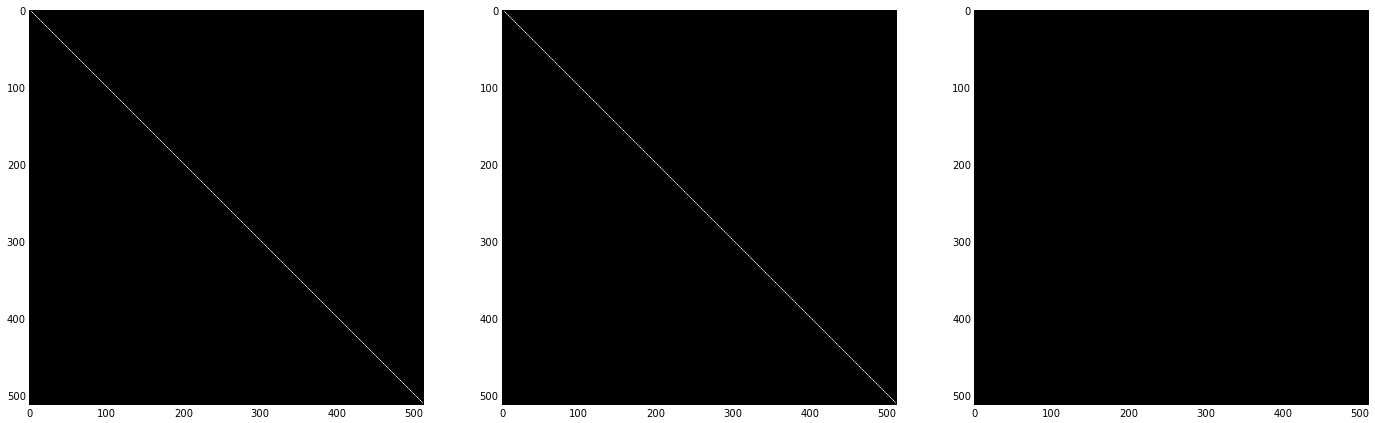

In [25]:
figsize(24,12)
gray()
subplot(131); imshow(dot(sins,sins.T),vmax=1); print amin(dot(sins,sins.T)),amax(dot(sins,sins.T))
subplot(132); imshow(dot(coss,coss.T),vmax=1); print amin(dot(coss,coss.T)),amax(dot(coss,coss.T))
subplot(133); imshow(dot(sins,coss.T),vmax=1); print amin(dot(sins,coss.T)),amax(dot(sins,coss.T))

We can also look at these matrices themselves



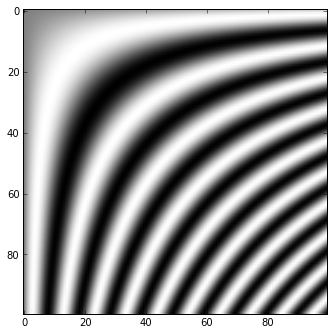

In [26]:
figsize(12,12)
subplot(121); imshow(sins[:100,:100])

Now we can perform transforms with this matrix.



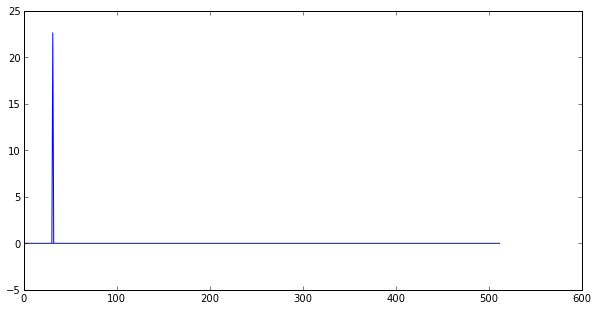

In [27]:
figsize(10,5)
plot(dot(sins,data32))
plot(dot(coss,data32))

When there is a phase shift, we get both sine and cosine components.
Note that we deleted the 0 frequency vector in the sines, so the non-zero components
actually differ by 1.



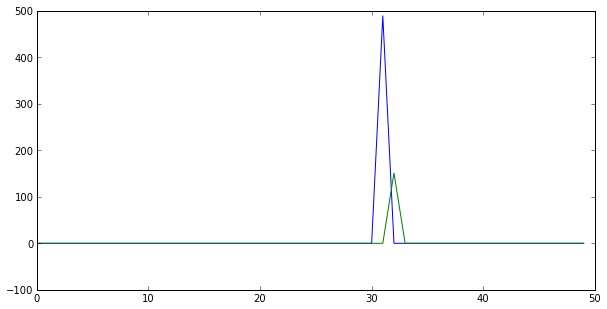

In [28]:
figsize(10,5)
plot(dot(sins,data32p)[:50])
plot(dot(coss,data32p)[:50])

It's useful to combine these two signals in a way in which each component
is independent of phase.
This is the _spectrum_.



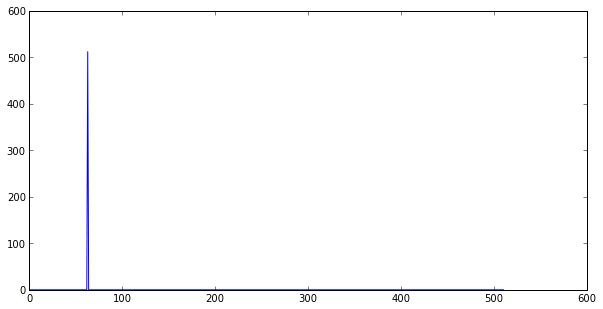

In [29]:
figsize(10,5)
plot(dot(sins,data64)[:-1]**2+dot(coss,data64)[1:]**2)

Invertible Transform
=======================

We can combine the sine and cosine tranforms into a single matrix and then invert that in order to get an inverse transform.



In [30]:
ft = r_[sins,coss]
ift = inv(ft)
def transform(signal):
    return dot(ft,signal)
def itransform(signal):
    return dot(ift,signal)

In [31]:
# computing a spectrum using the sins/coss matrices
def spectrum(signal):
    return dot(sins,signal)[:-1]**2+dot(coss,signal)[1:]**2

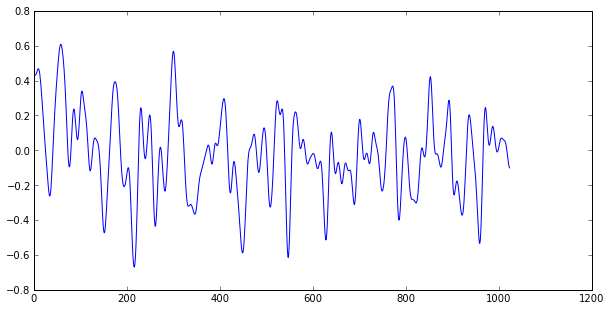

In [32]:
# generating a random signal
from scipy.ndimage import filters
wave = filters.gaussian_filter(randn(1024),5.0)
plot(wave)

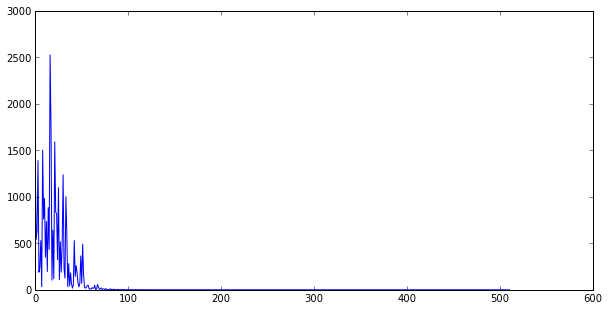

In [33]:
plot(spectrum(wave))

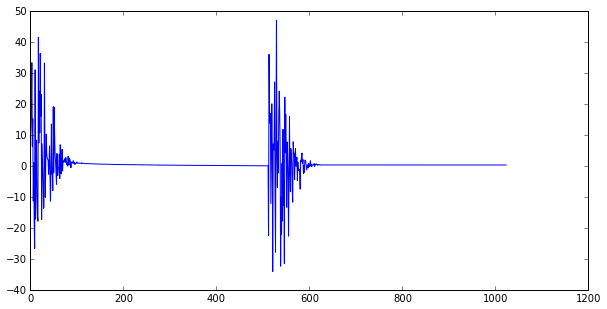

In [34]:
plot(transform(wave))

In [35]:
# the inverse transform actually works
norm(wave-itransform(transform(wave)))

1.1805691881113141e-13

Signals after the Fourier Transform
=====================================

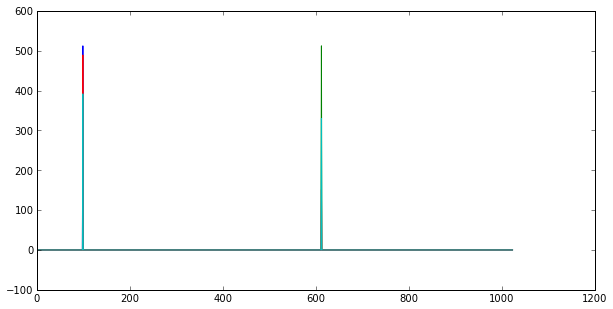

In [36]:
# plotting signals only differing by phase
for phase in [0.0,pi/2,0.3,0.7]:
    frequency = 100
    plot(transform(sin(2.0*pi*arange(1024)*frequency/1024.0+phase)))

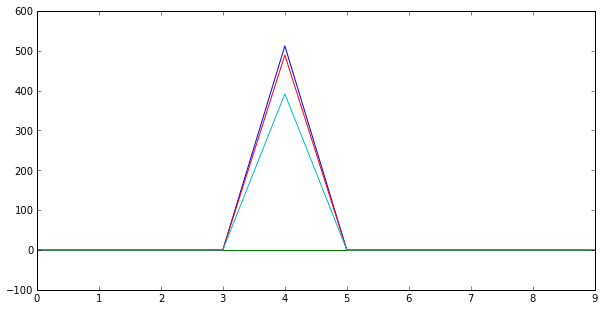

In [37]:
# plotting signals only differing by phase (magnified)
for phase in [0.0,pi/2,0.3,0.7]:
    frequency = 100
    plot(transform(sin(2.0*pi*arange(1024)*frequency/1024.0+phase))[95:105])

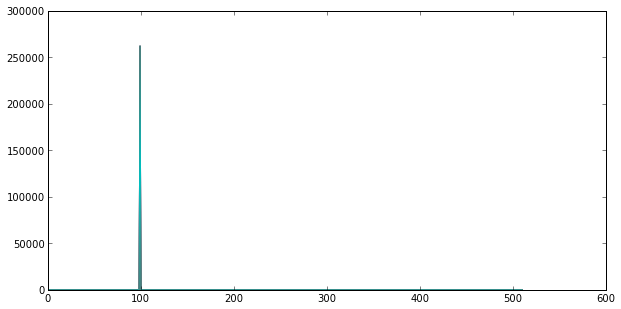

In [38]:
# plotting spectrum of signals only differing by phase
for phase in [0.0,pi/2,0.3,0.7]:
    frequency = 100
    signal = sin(frequency*x+phase)
    plot(spectrum(signal))

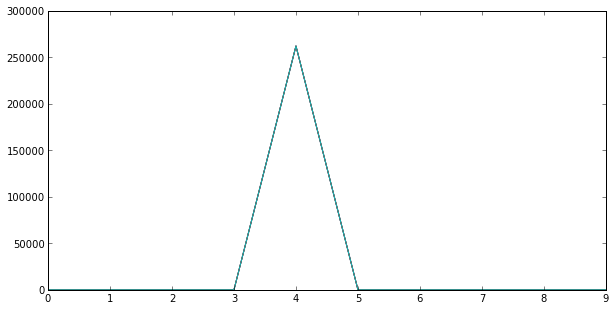

In [39]:
# magnified spectrum of signals only differing by phase
for phase in [0.0,pi/2,0.3,0.7]:
    frequency = 100
    signal = sin(frequency*x+phase)
    plot(spectrum(signal)[95:105])

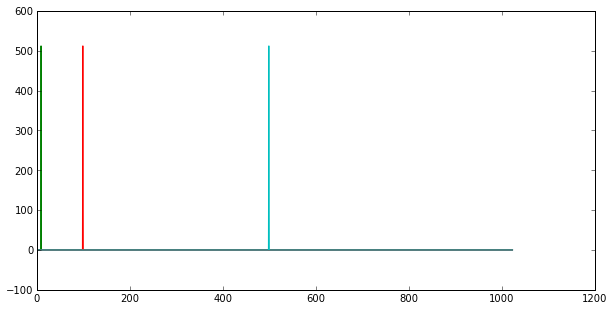

In [40]:
# plotting transform of signals differing by frequency
for frequency in [1,10,100,500]:
    signal = sin(frequency*x)
    plot(transform(signal))

Complex Numbers
================

(Complex Numbers)

Recall that we can define complex numbers by introducing an abstract symbol for some unknown imaginary quantity $j$, such that $j^2=-1$.
In fact, that's how complex numbers are defined: as a kind of simplest solution to the simplest polynomial equation that doesn't have a
solution over the reals.

We can then write numbers like:

$c = x + jy$

and derive formulas for addition, multiplication, etc.  For example:

$$c_1 \cdot c_2 = (x_1 + jy_1)(x_2 + jy_2) = x_1x_2 + x_1 jy_2 + jy_1 x_2 + jy_1 jy_2 = (x_1x_2-y_1y_2) + j(x_1y_2+x_2y_1)$$

(Complex Numbers and Trigonometric Functions)

Complex numbers are closely tied to trigonometric functions.
That's because complex numbers can be thought of as 2D vectors and how they behave under multiplication.

We can write a complex number also as a _phase angle_ and _magnitude_:

$c = x + jy = r (\cos \alpha + j \sin \alpha)$

In fact, a shorter way of writing this is as _Euler's formula_:

$c = r e^{i\alpha} = r (\cos \alpha + j \sin \alpha)$

There are many ways of seeing that this identity is true, but the simplest one is probably
by thinking of $\sin$ and $\cos$ as solutions to differential equations and seeing that
Euler's formula satisfies these equations.

(Polar and Cartesian Representations)

To convert between the two representations, note that

$$\alpha = \arctan \frac{y}{x}$$

$$r = \sqrt{x^2+y^2}$$

(Note that you get get these values with `numpy.angle` and `numpy.abs`.)

From Euler's formula, we also immediately see that:

$$c_1 \cdot c_2 = r_1 e^{j\alpha_1} \cdot r_2 e^{j\alpha_2} = r_1 r_2 e^{j(\alpha_1+\alpha_2)}$$

(Complex Basis of Fourier Transform)

With complex numbers, we can also now write the basis functions for our transform in a more compact way:

$$b(n,k) = e^{-2\pi~\frac{kn}{N}~j}$$

If you expand this, you'll see that this gives rise to the same sine and cosine-based components we have
been using above, except for the odd behavior for $k=0$ and $k=N/2$ (we don't have to worry about those
with complex numbers, since they are both important there).

Note that complex numbers behave otherwise very much like real numbers; in particular, we can
also apply most of linear algebra.  So we can perform expansions just like before.

In [41]:
def b(k,n,N):
    return exp(-2*pi*1j*k*n/N)
N = 420
n = arange(0,420)

In [42]:
s = b(3,n,N)

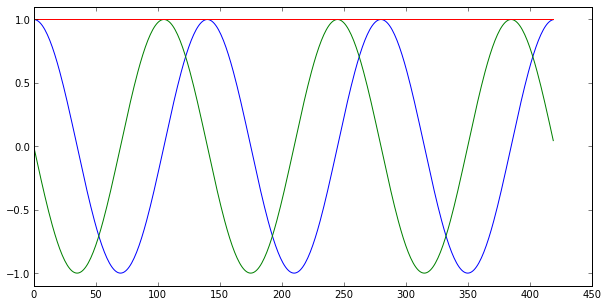

In [43]:
ylim(-1.1,1.1)
plot(real(s))
plot(imag(s))
plot(abs(s),color='r')

(Discrete Fourier Transform with Complex Numbers)

The formal definition of the discrete Fourier transform is now:

$$X_k = \sum_{n=0}^{N-1} x_n e^{-\frac{2 \pi i}{N} k n} \quad \quad k = 0, \dots, N-1$$

As before, we can put the Fourier transform into a matrix, call it `F`.

This is now a complex matrix, but its real and complex components operate completely separately
(provided we give it real input vectors).

In [44]:
F = array([b(k,n,N) for k in range(0,N)])

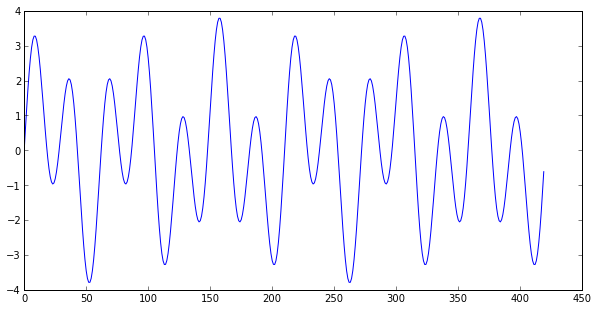

In [45]:
a1 = 1.5
a2 = 2.3
omega1 = 6*2*pi/N
omega2 = 14*2*pi/N
y = a1*sin(n*omega1) + a2*sin(n*omega2)
plot(y)

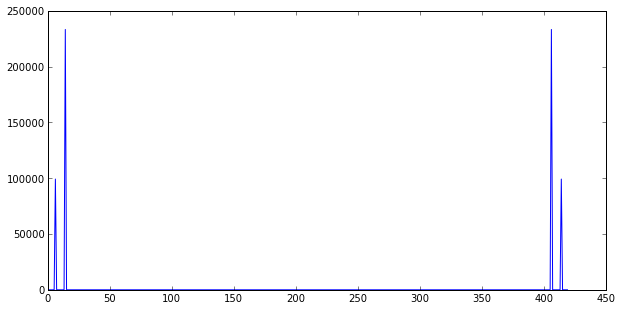

In [46]:
Y = dot(F,y)
plot(abs(Y)**2)

In [47]:
[i for i in range(N) if abs(Y[i])>100]

[6, 14, 406, 414]

Fourier Transform of Common Signals
===================================

There are some common signals that you should recognize the Fourier transform of.



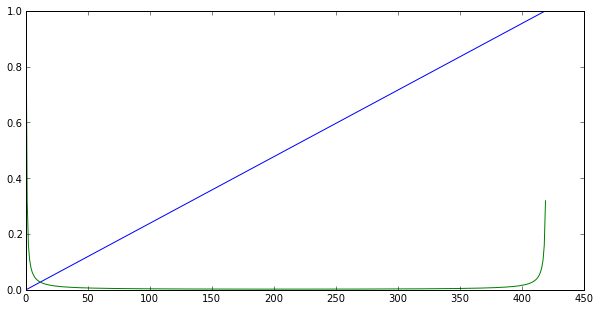

In [48]:
def max1(x): return x*1.0/amax(abs(x))

signal = n
transform = dot(F,signal)
plot(max1(signal))
plot(max1(abs(transform)))

Remember that the Fourier transform implements convolutions with circular boundary conditions.  Therefore, the signal that the Fourier transform sees isn't the nice-looking smooth signal above, but one with a sharp discontinuity.  We can see this by shifting the signal circularly.



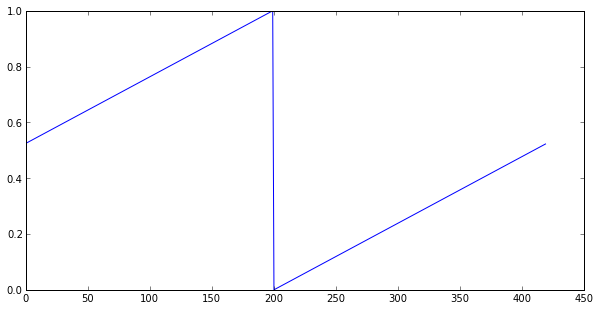

In [49]:
plot(roll(max1(signal),200))

A double sawtooth illustrates this as well and is similar.



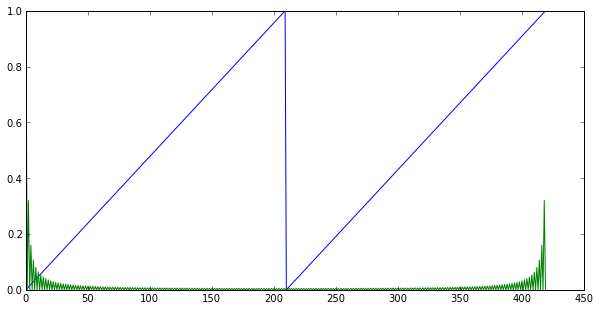

In [50]:
signal = concatenate([n,n])[2*n]
transform = dot(F,signal)
plot(max1(signal))
plot(max1(abs(transform)))

The Fourier transform of an impulse is a flat spectrum.



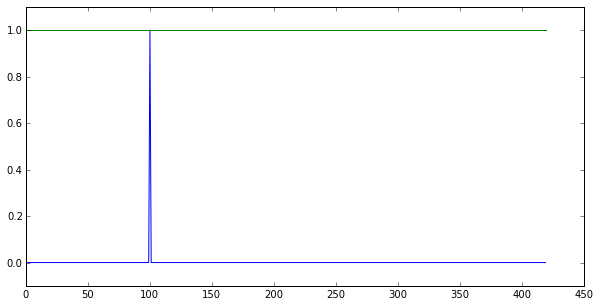

In [51]:
signal = (n==100)
transform = dot(F,signal)
ylim(-0.1,1.1)
plot(max1(signal))
plot(max1(abs(transform)))

Again, we're actually looking at a circular convolution, so what the Fourier transform "sees" is this.



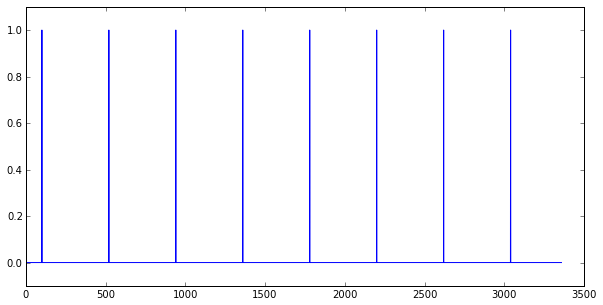

In [52]:
ylim(-0.1,1.1)
plot(max1(concatenate([signal for i in range(8)])))

If the signal isn't a perfect impulse but a little broader, the transform changes significantly.



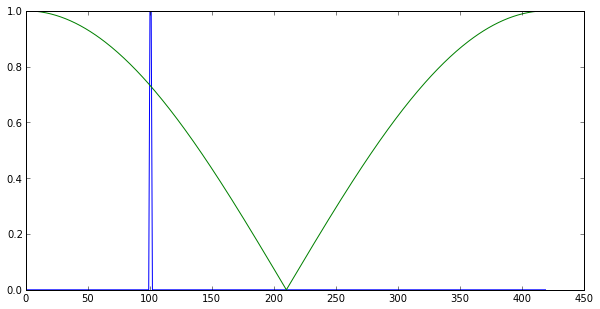

In [53]:
signal = (n>=100) * (n<102)
transform = dot(F,signal)
plot(max1(signal))
plot(max1(abs(transform)))

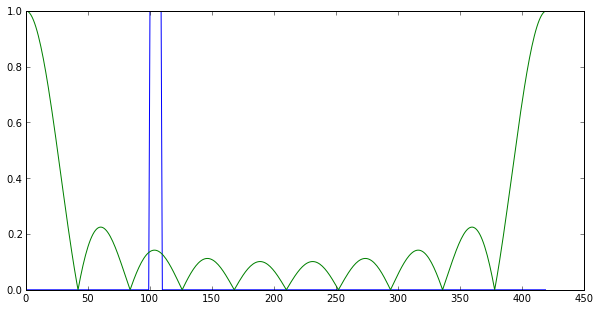

In [54]:
signal = (n>=100) * (n<110)
transform = dot(F,signal)
plot(max1(signal))
plot(max1(abs(transform)))



The Fourier transform of the Gaussian is very important in practice.



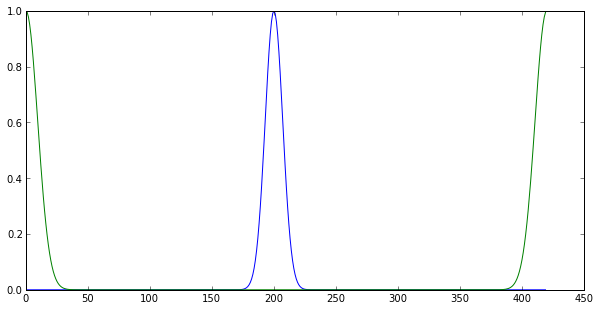

In [55]:
signal = exp(-(n-200)**2/100.0)
signal /= amax(signal)
transform = dot(F,signal)
plot(max1(signal))
plot(max1(abs(transform)))

It's kind of difficult to see what's going on here.  It becomes easier if we shift the output of the transform to overlap with the original signal.  Then it becomes pretty clear that the Fourier transform of a Gaussian is again a Gaussian.  Some experimentation shows that the wider the original Gaussian, the narrower its transform and vice versa.



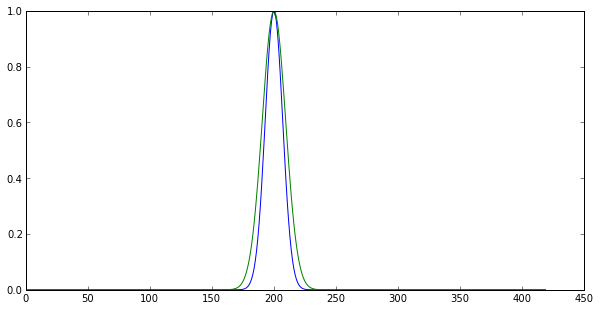

In [56]:
plot(max1(signal))
plot(roll(max1(abs(transform)),200))

# Inverse Fourier Transform

Of course, we can transform back as well. $F$ is a matrix, so we just take its inverse.



/usr/lib/python2.7/dist-packages/numpy/core/numeric.py:320: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


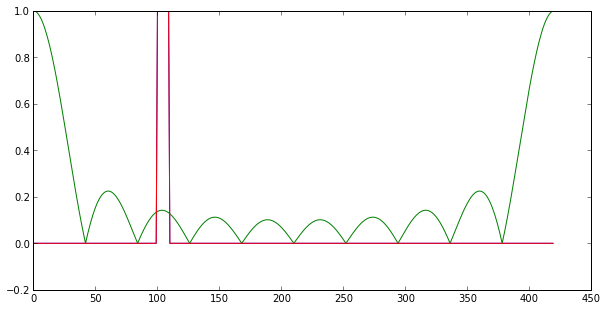

In [57]:
signal = (n>=100) * (n<110)
transform = dot(F,signal)
reconstructed = dot(inv(F),transform)

plot(max1(signal))
plot(max1(abs(transform)))
plot(max1(reconstructed))

What happens if we apply the Fourier transform matrix $F$ twice?



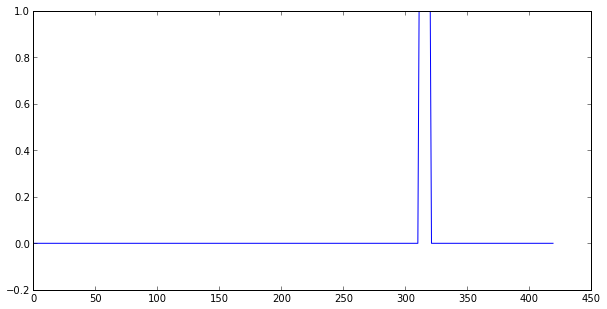

In [58]:
double = dot(F,transform)
plot(max1(double))

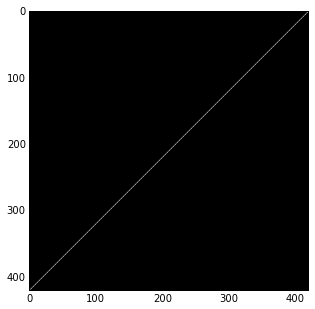

In [59]:
imshow(abs(dot(F,F))); gray()

(Inverse Fourier Transform)

So, from $F \cdot F$, we see that the Fourier transform is almost its own inverse, except for a reflection.

The actual formula for the inverse discrete Fourier transform (IDFT) is

$$x_n = \frac{1}{N} \sum_{k=0}^{N-1} X_k e^{\frac{2\pi i}{N} k n} \quad \quad n = 0,\dots,N-1.$$

Note the sign change and the normalization factor.  Other than that, the formula is the same as for the regular disrete Fourier transform.

(Properties of the Fourier Transform)

The Fourier transform has a number of important properties; you should know these by heart.

The Fourier transform is linear:

$$ {\cal F}[a f + b g] = a {\cal F}[f] + b {\cal F} [g] $$

The Fourier transform turns translations into multiplications with a complex number (and the other way around):

$$ {\cal F} [ f(x - x_0) ] ( \omega ) = e^{ -2\pi i x_0 \omega} {\cal F} [ f(x) ] (\omega)$$

The Fourier transform computes inverse scaling:

$$ {\cal F} [ f(ax) ] (\omega) = \frac{1}{|a|}{\cal F} [ f(x) ] (\frac{\omega}{a}) $$

The Fourier transform turns convolutions into multiplication:

$$ {\cal F}[f * g] = {\cal F}[f] \cdot {\cal F}[g] $$

Fast Fourier Transform
=======================




## Thomasson-Lanczos-Cooley-Tukey-Gauss Lemma

(DFT)

Let's look again at the definition of the discrete Fourier transform:

$$ X_k = \sum_{n=0}^{N-1} x_n e^{-\frac{2 \pi i}{N} k n} \quad \quad k = 0, \dots, N-1 $$

We also wrote this as a set of dot products:

$$ X_k = \sum_{n=0}^{N-1} x \cdot b_k $$

where

$$ b^{(k)}_n = e^{-\frac{2 \pi i}{N} k n} $$

(Complexity)

Or we can write it as a matrix multiplication:

$$ X = F \cdot x $$

where

$$ F_{kn} = b^{(k)}_n $$

For a signal of length $N$, this takes $N^2$ operations.

It turns out that we can compute this particular matrix product in time $\log N$.

(Thomasson-Lanczos Lemma)

The key observation is the Thomasson-Lanczos Lemma, or the Cooley-Tukey Lemma.  Gauss also knew this.

The insight is that we can write the DFT $S$ of a sigal $s$ as the weighted sum of two half-length DFTs.  In particular,

$$S_j = S^e_j + e^{\frac{2\pi i j}{N}} S^o_j$$

$$S_{j+\frac{N}{2}} = S^e_j - e^{\frac{2\pi i j}{N}} S^o_j$$

Here, $S^e$ and $S^o$ are the even and odd elements of $S$, respectively.

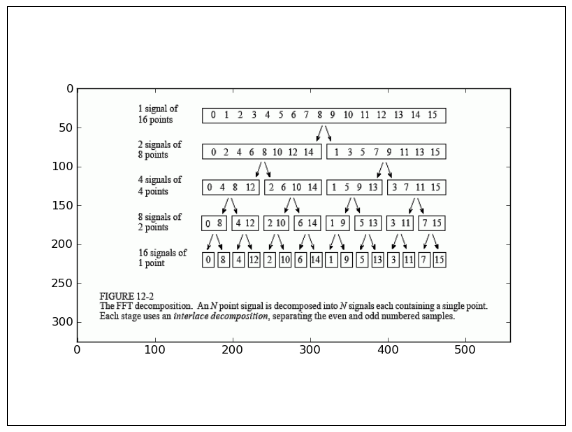

In [60]:
figsize(10,10); xticks([]); yticks([]); imshow(imread("Figures/fft-image.png"))

This observation is easy to translate into a recursive function for computing the Fourier transform.  Note that this function only works for input signals whose length is a power of two. 

For other kinds of input lengths, there are more complicated decompositions, or such signals need to get padded.  For signals of prime lengths, there is no decomposition like this (i.e., we can only decompose the problem into subproblems whose lenghts are factors of the original length).

In [61]:
def myfft(s): 
    N = len(s)
    if N<=1: return s
    Se = fft(s[::2])
    So = fft(s[1::2])
    e = exp(arange(0,N/2)*2j*pi/N)
    return r_[Se+e*So,Se-e*So]
    
myfft(array([1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0]))

array([ 2.00000000+0.j        ,  1.70710678+0.70710678j,
        1.00000000+1.j        ,  0.29289322+0.70710678j,
        0.00000000+0.j        ,  0.29289322-0.70710678j,
        1.00000000-1.j        ,  1.70710678-0.70710678j])

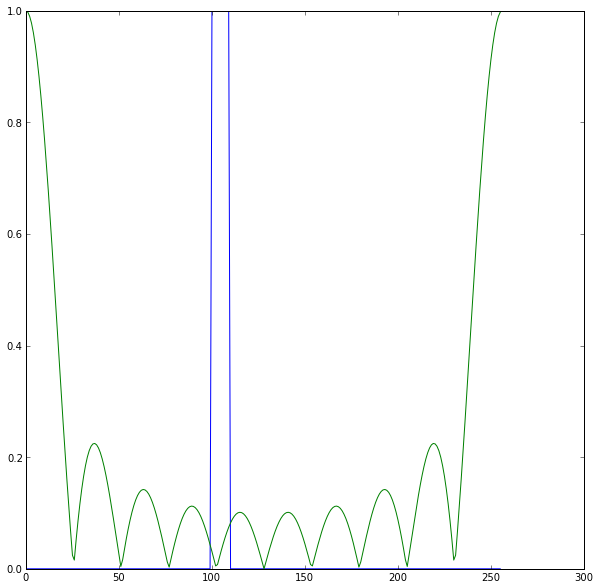

In [62]:
k = arange(256)
signal = 1.0*(k>=100)*(k<110)
transform = myfft(signal)
plot(max1(signal))
plot(max1(abs(transform)))

# Fourier-Based Audio Filtering

Let's do a simple Fourier-based audio filter. Let's try to filter out the high frequency components.



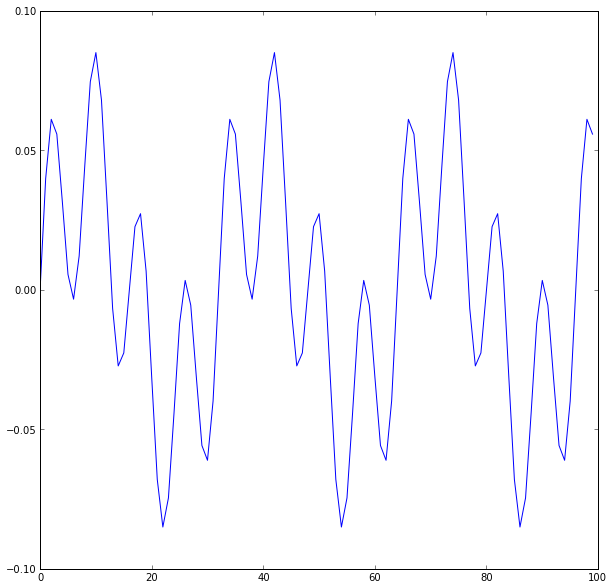

In [63]:
mix = data32+data128
plot(mix[:100])
play(mix,r=10)

We can see the two components in the frequency domain.



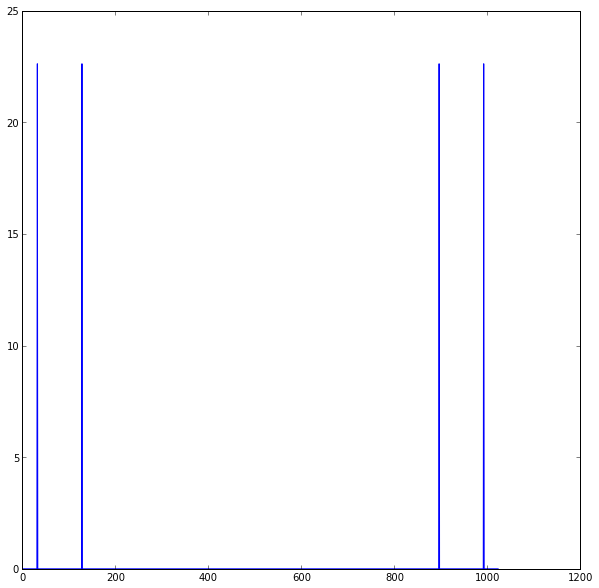

In [64]:
plot(abs(fft(mix)))

Now let's zero out the two high frequency peaks.



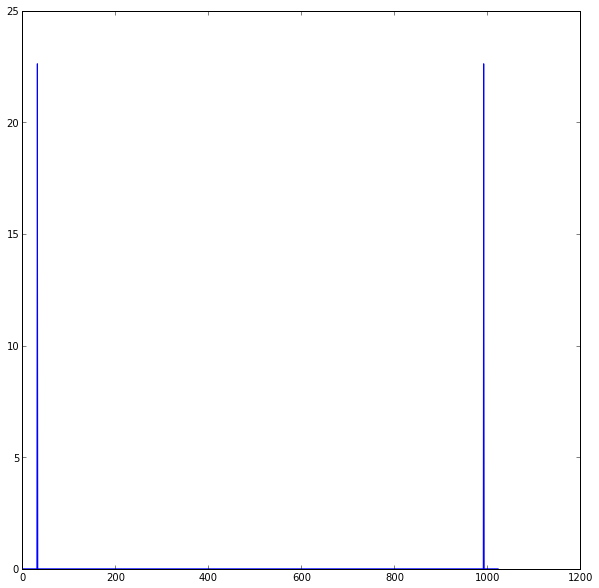

In [65]:
transform = fft(mix)
transform[120:130] = 0
transform[-130:-120] = 0
plot(abs(transform))

We can now see the result of the filtering operation.



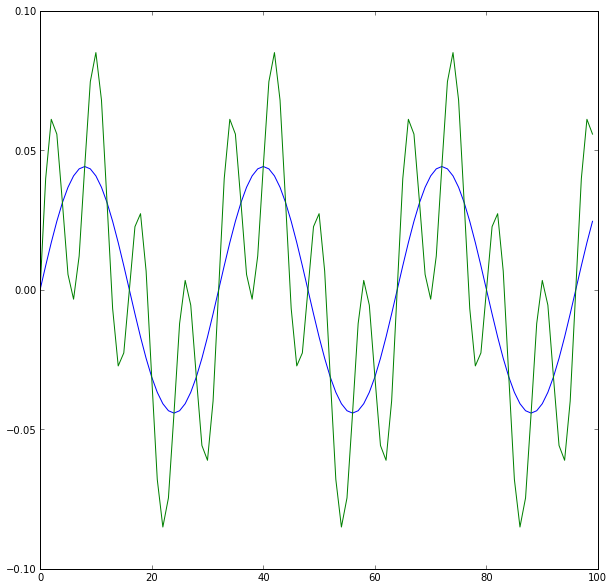

In [66]:
plot(real(ifft(transform))[:100])
plot(mix[:100])

The original sound...



In [67]:
play(mix,r=10)

The filtered sound...



In [68]:
play(real(ifft(transform)),r=10)

Removing Noise in the Fourier Domain
=====================================

Let's generate a signal corrupted by an interfering sound.



In [75]:
test = numpy.fromfile("test.raw","int32")[::2]
test = test*1.0/amax(abs(test))
noise = test+2*sin(arange(len(test))/5.0)
play(noise)

We perform a Fourier transform and look for the spectral location of the interference.



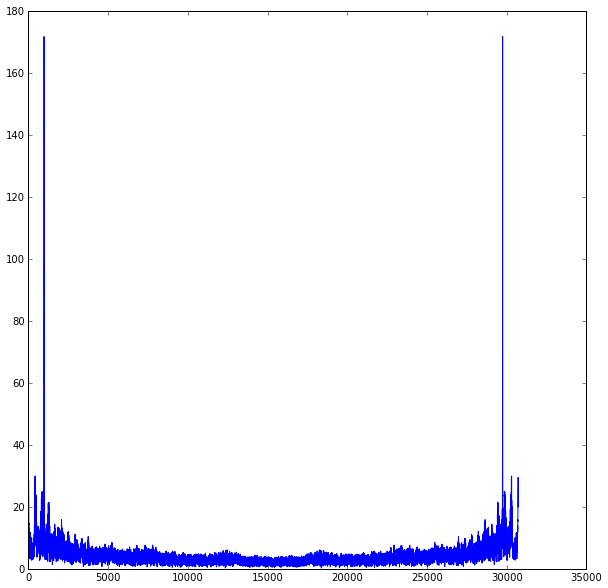

In [76]:
Noise = fft(noise)
plot((abs(Noise)**.5))

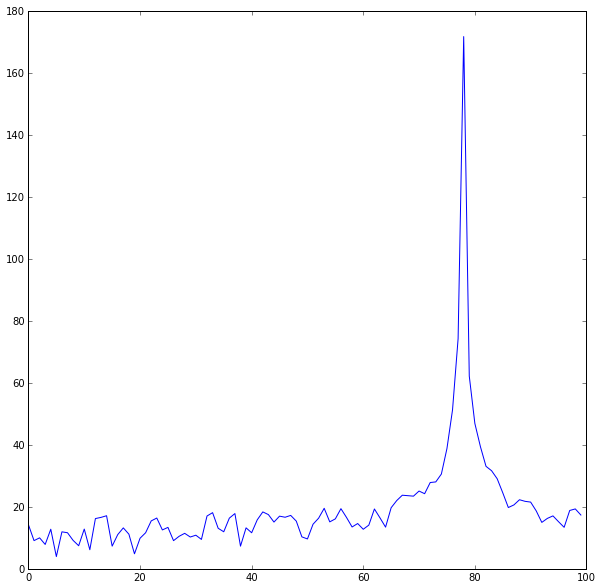

In [77]:
plot((abs(Noise)**.5)[900:1000])

Now we zero out the region containing the interfering signal.



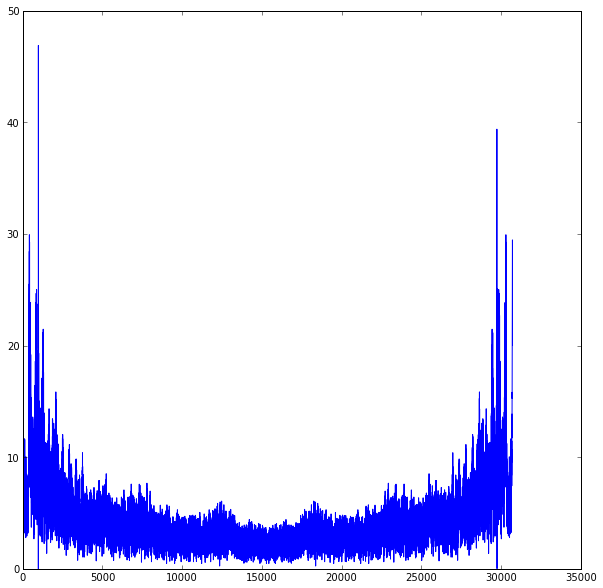

In [78]:
Noise[970:980] = 0
Noise[-980:-970] = 0
plot(abs(Noise)**.5)

Finally, we transform back. Note that this doesn't get rid of the noise completely, in part because a value of 0 isn't quite correct either.



In [79]:
denoised = ifft(Noise)
play(real(denoised))

For comparison, here is the original.



In [74]:
play(noise)